Anomalías encontradas:
Línea 4: Jan 14 00:00:23 redhumus postfix/10025/smtpd[806796]: connect from localhost[127.0.0.1]
Línea 5: Jan 14 00:00:23 redhumus postfix/trivial-rewrite[806787]: warning: do not list domain redhumus.org in BOTH mydestination and virtual_mailbox_domains
Línea 6: Jan 14 00:00:23 redhumus postfix/trivial-rewrite[806787]: warning: do not list domain redhumus.org in BOTH mydestination and virtual_mailbox_domains
Línea 7: Jan 14 00:00:23 redhumus postfix/10025/smtpd[806796]: 4TCFlW3VLkz1vqB: client=localhost[127.0.0.1]
Línea 10: Jan 14 00:00:23 redhumus postfix/trivial-rewrite[806787]: warning: do not list domain redhumus.org in BOTH mydestination and virtual_mailbox_domains
Línea 11: Jan 14 00:00:23 redhumus postfix/10025/smtpd[806796]: disconnect from localhost[127.0.0.1] ehlo=1 mail=1 rcpt=1 data=1 quit=1 commands=5
Línea 12: Jan 14 00:00:23 redhumus amavis[512104]: (512104-01) Passed CLEAN {RelayedInternal}, ORIGINATING LOCAL [127.0.0.1] /ESMTP <root@redhumus.org

ValueError: Wedge sizes 'x' must be non negative values

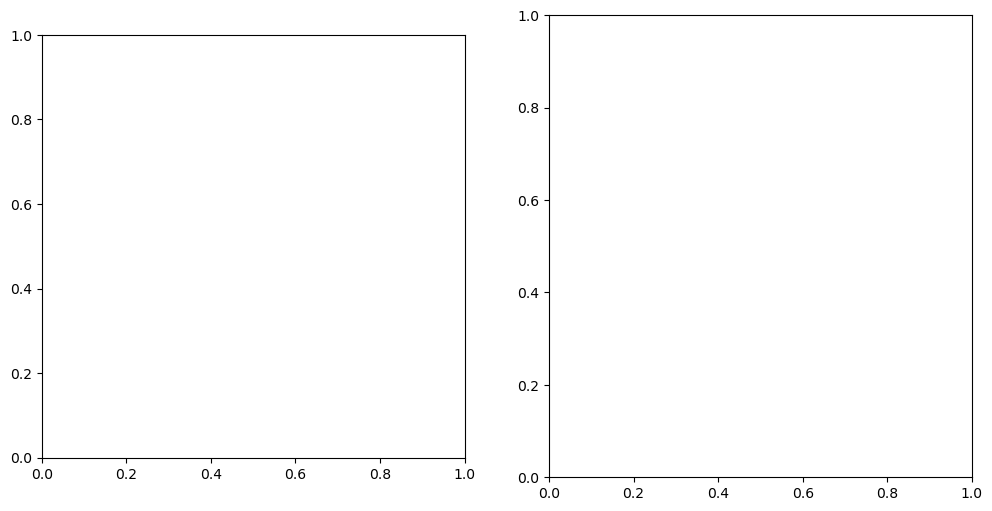

In [2]:
import re
import matplotlib.pyplot as plt
from collections import Counter

def analizar_mail_log(archivo_log):
    patrones = [
        r'\berror\b',
        r'\bwarning\b',
        r'\bfailed\b',
        r'\b(?:\d{1,3}\.){3}\d{1,3}\b'  # Patrón para detectar direcciones IP
    ]

    resultados = []
    ips = []

    with open(archivo_log, 'r') as archivo:
        lineas = archivo.readlines()
        for numero_linea, linea in enumerate(lineas, start=1):
            for patron in patrones:
                if re.search(patron, linea, flags=re.IGNORECASE):
                    resultados.append((numero_linea, linea.strip()))

                    # Si la línea contiene una IP, la almacenamos
                    if 'failed' not in patron:
                        ip_encontrada = re.search(r'\b(?:\d{1,3}\.){3}\d{1,3}\b', linea)
                        if ip_encontrada:
                            ips.append(ip_encontrada.group())

    return resultados, ips

def mostrar_resultados(resultados):
    if resultados:
        print("Anomalías encontradas:")
        for numero_linea, linea in resultados:
            print(f"Línea {numero_linea}: {linea}")
    else:
        print("No se encontraron anomalías en el archivo de registro.")

def generar_estadisticas(resultados, ips, total_lineas):
    total_anomalias = len(resultados)
    porcentaje_anomalias = (total_anomalias / total_lineas) * 100 if total_lineas > 0 else 0

    print(f"Total de líneas: {total_lineas}")
    print(f"Total de anomalías: {total_anomalias}")
    print(f"Porcentaje de anomalías: {porcentaje_anomalias:.2f}%")

    # Estadísticas de IP
    conteo_ips = Counter(ips)
    ip_mas_comun, cantidad_mas_comun = conteo_ips.most_common(1)[0] if conteo_ips else ('N/A', 0)

    print(f"\nIPs más comunes:")
    print(f"{ip_mas_comun}: {cantidad_mas_comun} conexiones")

    return total_anomalias, porcentaje_anomalias

def graficar_estadisticas(total_anomalias, porcentaje_anomalias, conteo_ips):
    etiquetas = ['Anomalías', 'Resto']
    tamanos = [total_anomalias, total_lineas - total_anomalias]

    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    axs[0].pie(tamanos, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['red', 'lightgrey'])
    axs[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    axs[0].set_title('Estadísticas de Anomalías en mail.log')

    # Gráfico de barras para IP más común
    if ip_mas_comun != 'N/A':
        ips = list(conteo_ips.keys())
        cantidades = list(conteo_ips.values())
        axs[1].bar(ips, cantidades, color='blue')
        axs[1].set_title('IPs más comunes')
        axs[1].set_xlabel('IPs')
        axs[1].set_ylabel('Número de conexiones')

    plt.show()

if __name__ == "__main__":
    archivo_log = "mail.log"  # Reemplaza con la ruta de tu archivo mail.log
    lineas = [linea.strip() for linea in open(archivo_log)]
    resultados, ips = analizar_mail_log(archivo_log)
    mostrar_resultados(resultados)
    total_lineas = len(lineas)
    total_anomalias, porcentaje_anomalias = generar_estadisticas(resultados, ips, total_lineas)
    graficar_estadisticas(total_anomalias, porcentaje_anomalias, Counter(ips))
